# Набор данных о сердечно-сосудистых заболеваниях 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

cardio = pd.read_csv('heart_data.csv')
cardio.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
cardio = cardio[cardio['ap_lo'] >= 60]
cardio = cardio[cardio['ap_lo'] <= 120]
cardio = cardio[cardio['ap_hi'] >= 90]
cardio = cardio[cardio['ap_hi'] <= 180]
cardio = cardio[cardio['age'] >= 14000]
cardio.drop(columns = ['index' ,'id'] ,axis = 1, inplace=True)

In [3]:
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000,68201.000000
mean,19463.171420,1.348631,164.372692,74.101090,126.435741,81.264439,1.363264,1.225187,0.087667,0.053137,0.803537,0.493717
std,2467.577804,0.476540,8.176751,14.288766,15.961670,9.143786,0.678094,0.571303,0.282813,0.224308,0.397326,0.499964
min,14275.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Выбор атрибута в качестве целевого класса

В качестве целевого атрибута выбран cardio (наличие или отсутствие сердечно-сосудистых заболеваний)

Классы сбалансированны:

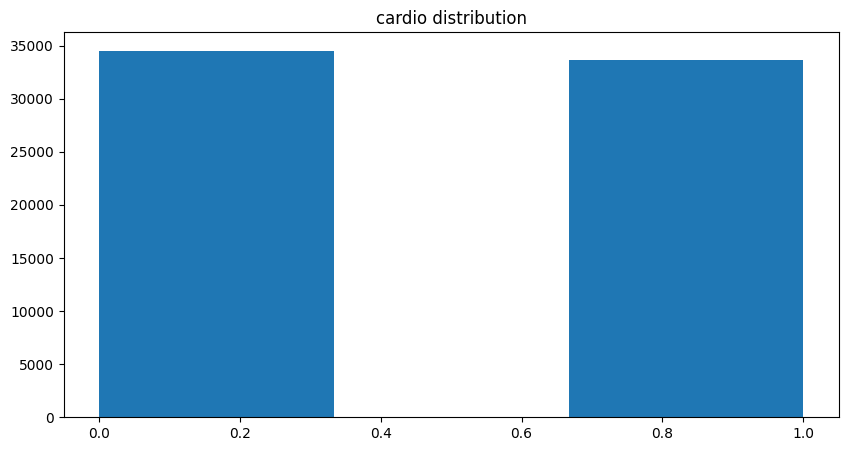

In [5]:
plt.figure(figsize=(10, 5)) 
plt.hist (cardio['cardio'], bins=3); 
plt.title('cardio distribution');

In [6]:
y = cardio["cardio"]
cardio.drop(["cardio"], axis=1, inplace=True)

## Метод kNN

In [7]:
from sklearn.model_selection import StratifiedKFold, train_test_split

Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_holdout, y_holdout). отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели.

In [8]:
X_train, X_holdout, y_train, y_holdout = train_test_split(cardio.values, y, test_size=0.3,
                                                          random_state=47, stratify=y)

Теперь попробуем настроить число соседей в алгоритме kNN.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_holdout,y_holdout))

In [10]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.98114788437368 % and k = [1]


In [11]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 70.13831191046381 % and k = [13]


Обучим модель kNN

In [12]:
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)
knn.score(X_holdout,y_holdout)

0.7013831191046381

## Дерво решений

Определим оптимальные параметры для дерева решений

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(max_depth=5, random_state=42)

tree_params = {"max_depth": range(1, 11), "max_features": range(4, 19)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

Обучим модель

In [14]:
tree_grid.fit(X_train,y_train)
tree_grid.best_params_, tree_grid.best_score_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


({'max_depth': 5, 'max_features': 10}, 0.7290532048596565)

In [16]:
from io import StringIO
import pydotplus
from ipywidgets import Image
from sklearn.tree import export_graphviz
dot_data = StringIO()
export_graphviz(
    tree_grid.best_estimator_, feature_names=cardio.columns, out_file=dot_data, filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x17'\x00\x00\x03\x07\x08\x06\x00\x00\x00=*\x9f\xd6\x…

## Сравнение полученных результатов

### Accuracy

Accuracy рассчитывает долю правильных классификаций, и определяется как соотношение всех истинных результатов и суммы всех комбинаций матрицы ошибок.

In [17]:
tree_pred = tree_grid.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.7305605786618445

In [18]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.7013831191046381

### Presicion

Precision отвечает за способность отличать заданный класс от всех остальных классов, зависит только от положительных результатов, то есть precision– соотношение между верно-положительными результатами (TP) и всеми положительно классифицированными объектами (TP и FP).

In [19]:
from sklearn.metrics import precision_score
precision_score(y_holdout, tree_pred)

0.7548594912806842

In [20]:
precision_score(y_holdout, knn_pred)

0.7123404255319149

### Recall

Метрика recall определяется с помощью верно-положительных результатов, но вместо ложно-положительных решений (FP) учитывает количество объектов, классифицированных как отрицательные, но фактически являющиеся положительными (FN). Данная метрика оценки демонстрирует способность обнаруживать определенный класс, и показывает сколько примеров из положительных было потеряно в результате классификации. Чем выше значение метрики recall, тем меньше и значение потери правильных предсказаний.


In [21]:
from sklearn.metrics import recall_score
recall_score(y_holdout, tree_pred)

0.6727380716689765

In [22]:
recall_score(y_holdout, knn_pred)

0.6628390417739062

### F-measure

F-measure является метрикой, которая сводит к одному числу две основных метрики оценки: precision и recall. Она нужна для сбалансирования, когда максимальное значение precision и recall не достижимы одновременно.

In [23]:
from sklearn.metrics import f1_score
f1_score(y_holdout, tree_pred)

0.7114367966500915

In [24]:
f1_score(y_holdout, knn_pred)

0.6866988001230644

### ROC

In [25]:
roc_auc_score(y_holdout, tree_pred)

0.7298433094130189

In [26]:
roc_auc_score(y_holdout, knn_pred)

0.700904992457568

Таким образом, результаты, полученные с помощью всех метрик оценки качества, выше для алгоритма дерева решений. Из этого следует, что данный алгоритм лучше справляется с данным набором данных.